# Example of shear-wave splitting applied to an icequake from Rutford Ice Stream, Antarctica

In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import swspy
import obspy
from obspy import UTCDateTime
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

## 1. Load data for event:

In [41]:
# Load data:
archive_path = "data/mseed"
archive_vs_file = "archive"
nonlinloc_event_path = "data/loc.Tom__RunNLLoc000.20090121.042009.grid0.loc.hyp"

starttime = UTCDateTime("20090121T042009.18523") - 0.5
endtime = UTCDateTime("20090121T042009.18523") + 2.5
load_wfs_obj = swspy.io.load_waveforms(archive_path, starttime=starttime, endtime=endtime)
load_wfs_obj.filter = True
load_wfs_obj.filter_freq_min_max = [1.0, 80.0]
st = load_wfs_obj.read_waveform_data()


In [42]:
# st = st.select(station="ST01")

In [32]:
# # Add noise to data (for testing...) :
# for i in range(len(st)):
#     st[i].data = st[i].data + 0.3*np.roll(st[i].data, int(np.random.uniform(-100, 100,1))) + 0.3*np.roll(st[i].data, int(np.random.uniform(-100, 100,1)))

## 2. Calculate splitting:

In [43]:
# Calculate splitting:
splitting_event = swspy.splitting.create_splitting_object(st, nonlinloc_event_path=nonlinloc_event_path) #(st, nonlinloc_event_path) #(st.select(station="ST01"), nonlinloc_event_path)
splitting_event.overall_win_start_pre_fast_S_pick = 0.3 #0.1
splitting_event.win_S_pick_tolerance = 0.1
splitting_event.overall_win_start_post_fast_S_pick = 0.2 #0.2
splitting_event.rotate_step_deg = 2.0 #1.0 #2.5
splitting_event.max_t_shift_s = 0.1 #0.12
splitting_event.n_win = 10 #5 #10
# splitting_event.perform_sp
# splitting_event.perform_sws_analysis(coord_system="ZNE", sws_method="EV_and_XC") #(coord_system="LQT") #(coord_system="ZNE")
splitting_event.perform_sws_analysis(coord_system="ZNE", sws_method="EV") #(coord_system="LQT") #(coord_system="ZNE")


No S phase pick for station: ST06 therefore skipping this station.
No S phase pick for station: ST07 therefore skipping this station.
No S phase pick for station: ST08 therefore skipping this station.
No S phase pick for station: ST09 therefore skipping this station.
No S phase pick for station: ST10 therefore skipping this station.


station   phi  phi_err     dt  dt_err     src_pol  src_pol_err  Q_w  \
0    ST01  70.0      4.0  0.048   0.001  176.924194    83.284391  NaN   
0    ST02  88.0      3.0  0.042   0.018   38.942009    57.118886  NaN   
0    ST03 -66.0      4.0  0.020   0.001   42.549676    13.808939  NaN   
0    ST04  76.0      2.0  0.044   0.001  177.495313    39.965834  NaN   
0    ST05 -90.0     91.0  0.000   0.050    0.542005    21.194206  NaN   

   ray_back_azi  ray_inc  
0        108.74    156.5  
0         29.53    160.6  
0        354.47    144.4  
0        282.07    163.9  
0         48.57    141.8

In [44]:
splitting_event.clustering_info

{'ST01': {'min_var_idx': 0,
  'clusters_dict': {'0': {'lags': array([ 0.048,  0.048,  0.048,  0.048,  0.048,  0.048,  0.048,  0.048,
            0.048,  0.048]),
    'lag_errs': array([ 0.001,  0.001,  0.001,  0.001,  0.001,  0.001,  0.001,  0.001,
            0.001,  0.001]),
    'phis': array([ 70.,  70.,  70.,  70.,  70.,  70.,  70.,  70.,  70.,  70.]),
    'phi_errs': array([ 4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.])},
   '1': {'lags': array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
            0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
            0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
            0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
            0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
            0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
            0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
    'lag_errs': array([

## 3. Plot result:

<IPython.core.display.Javascript object>


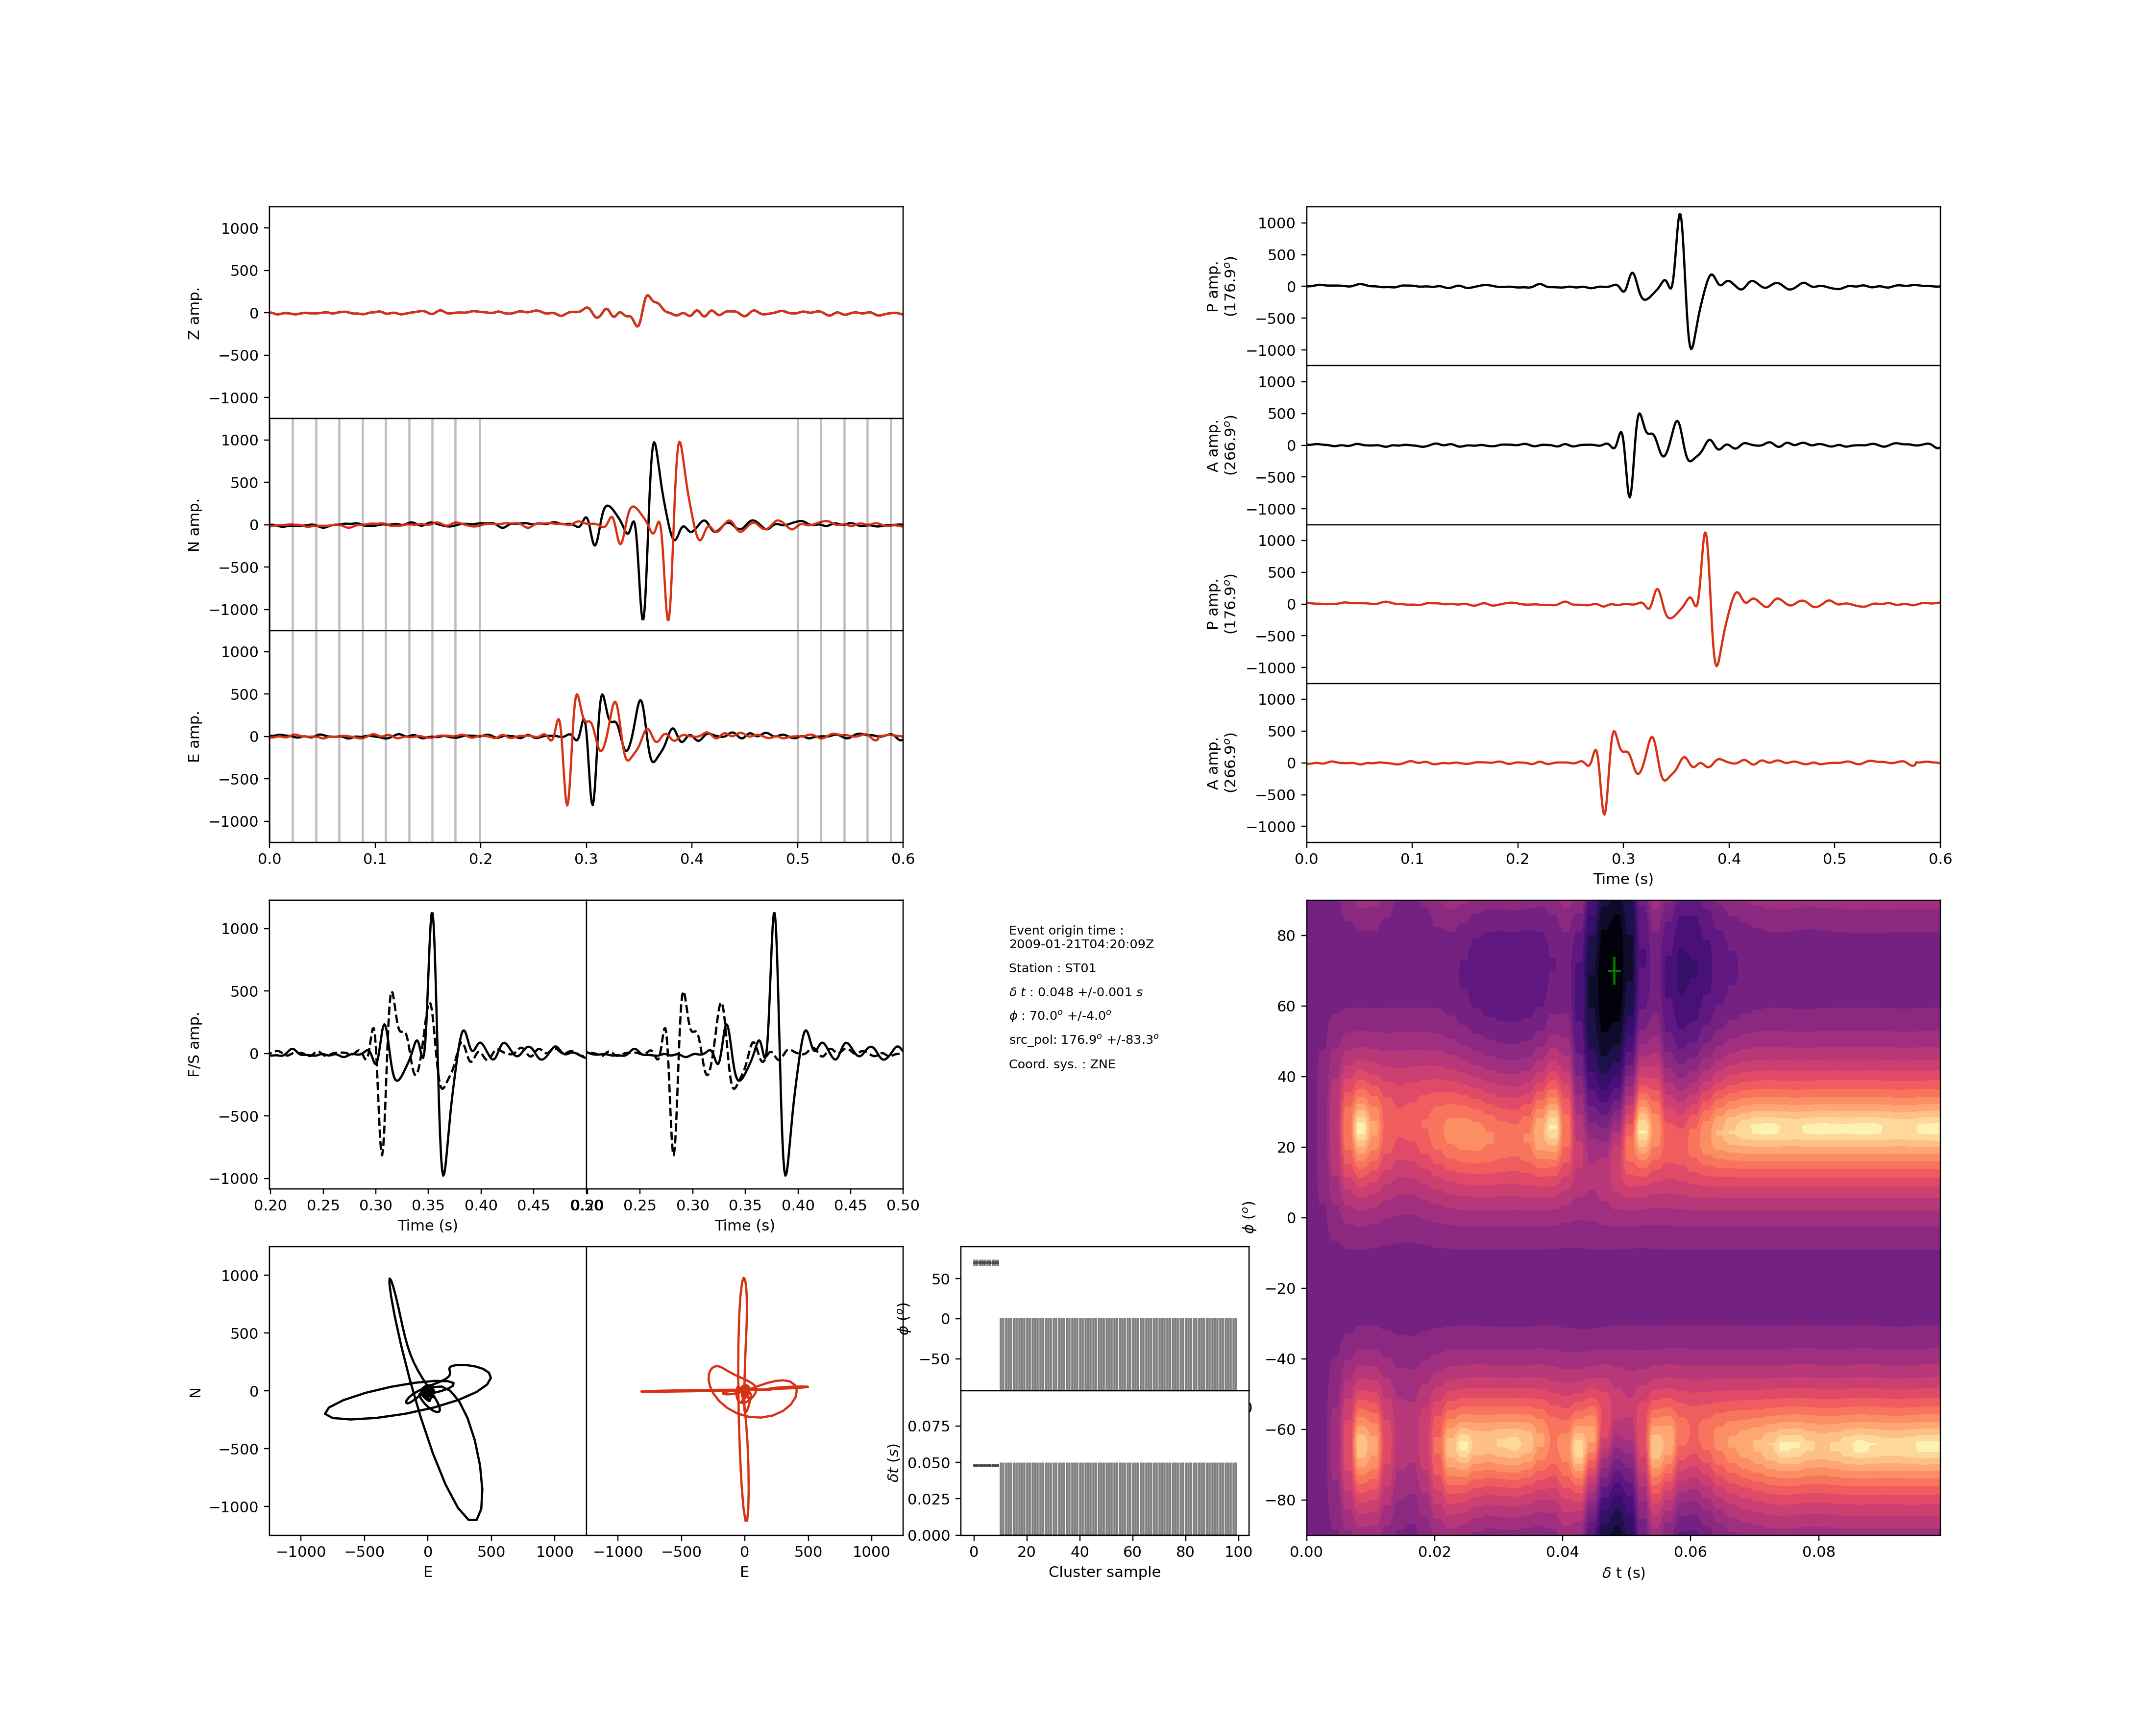

<IPython.core.display.Javascript object>


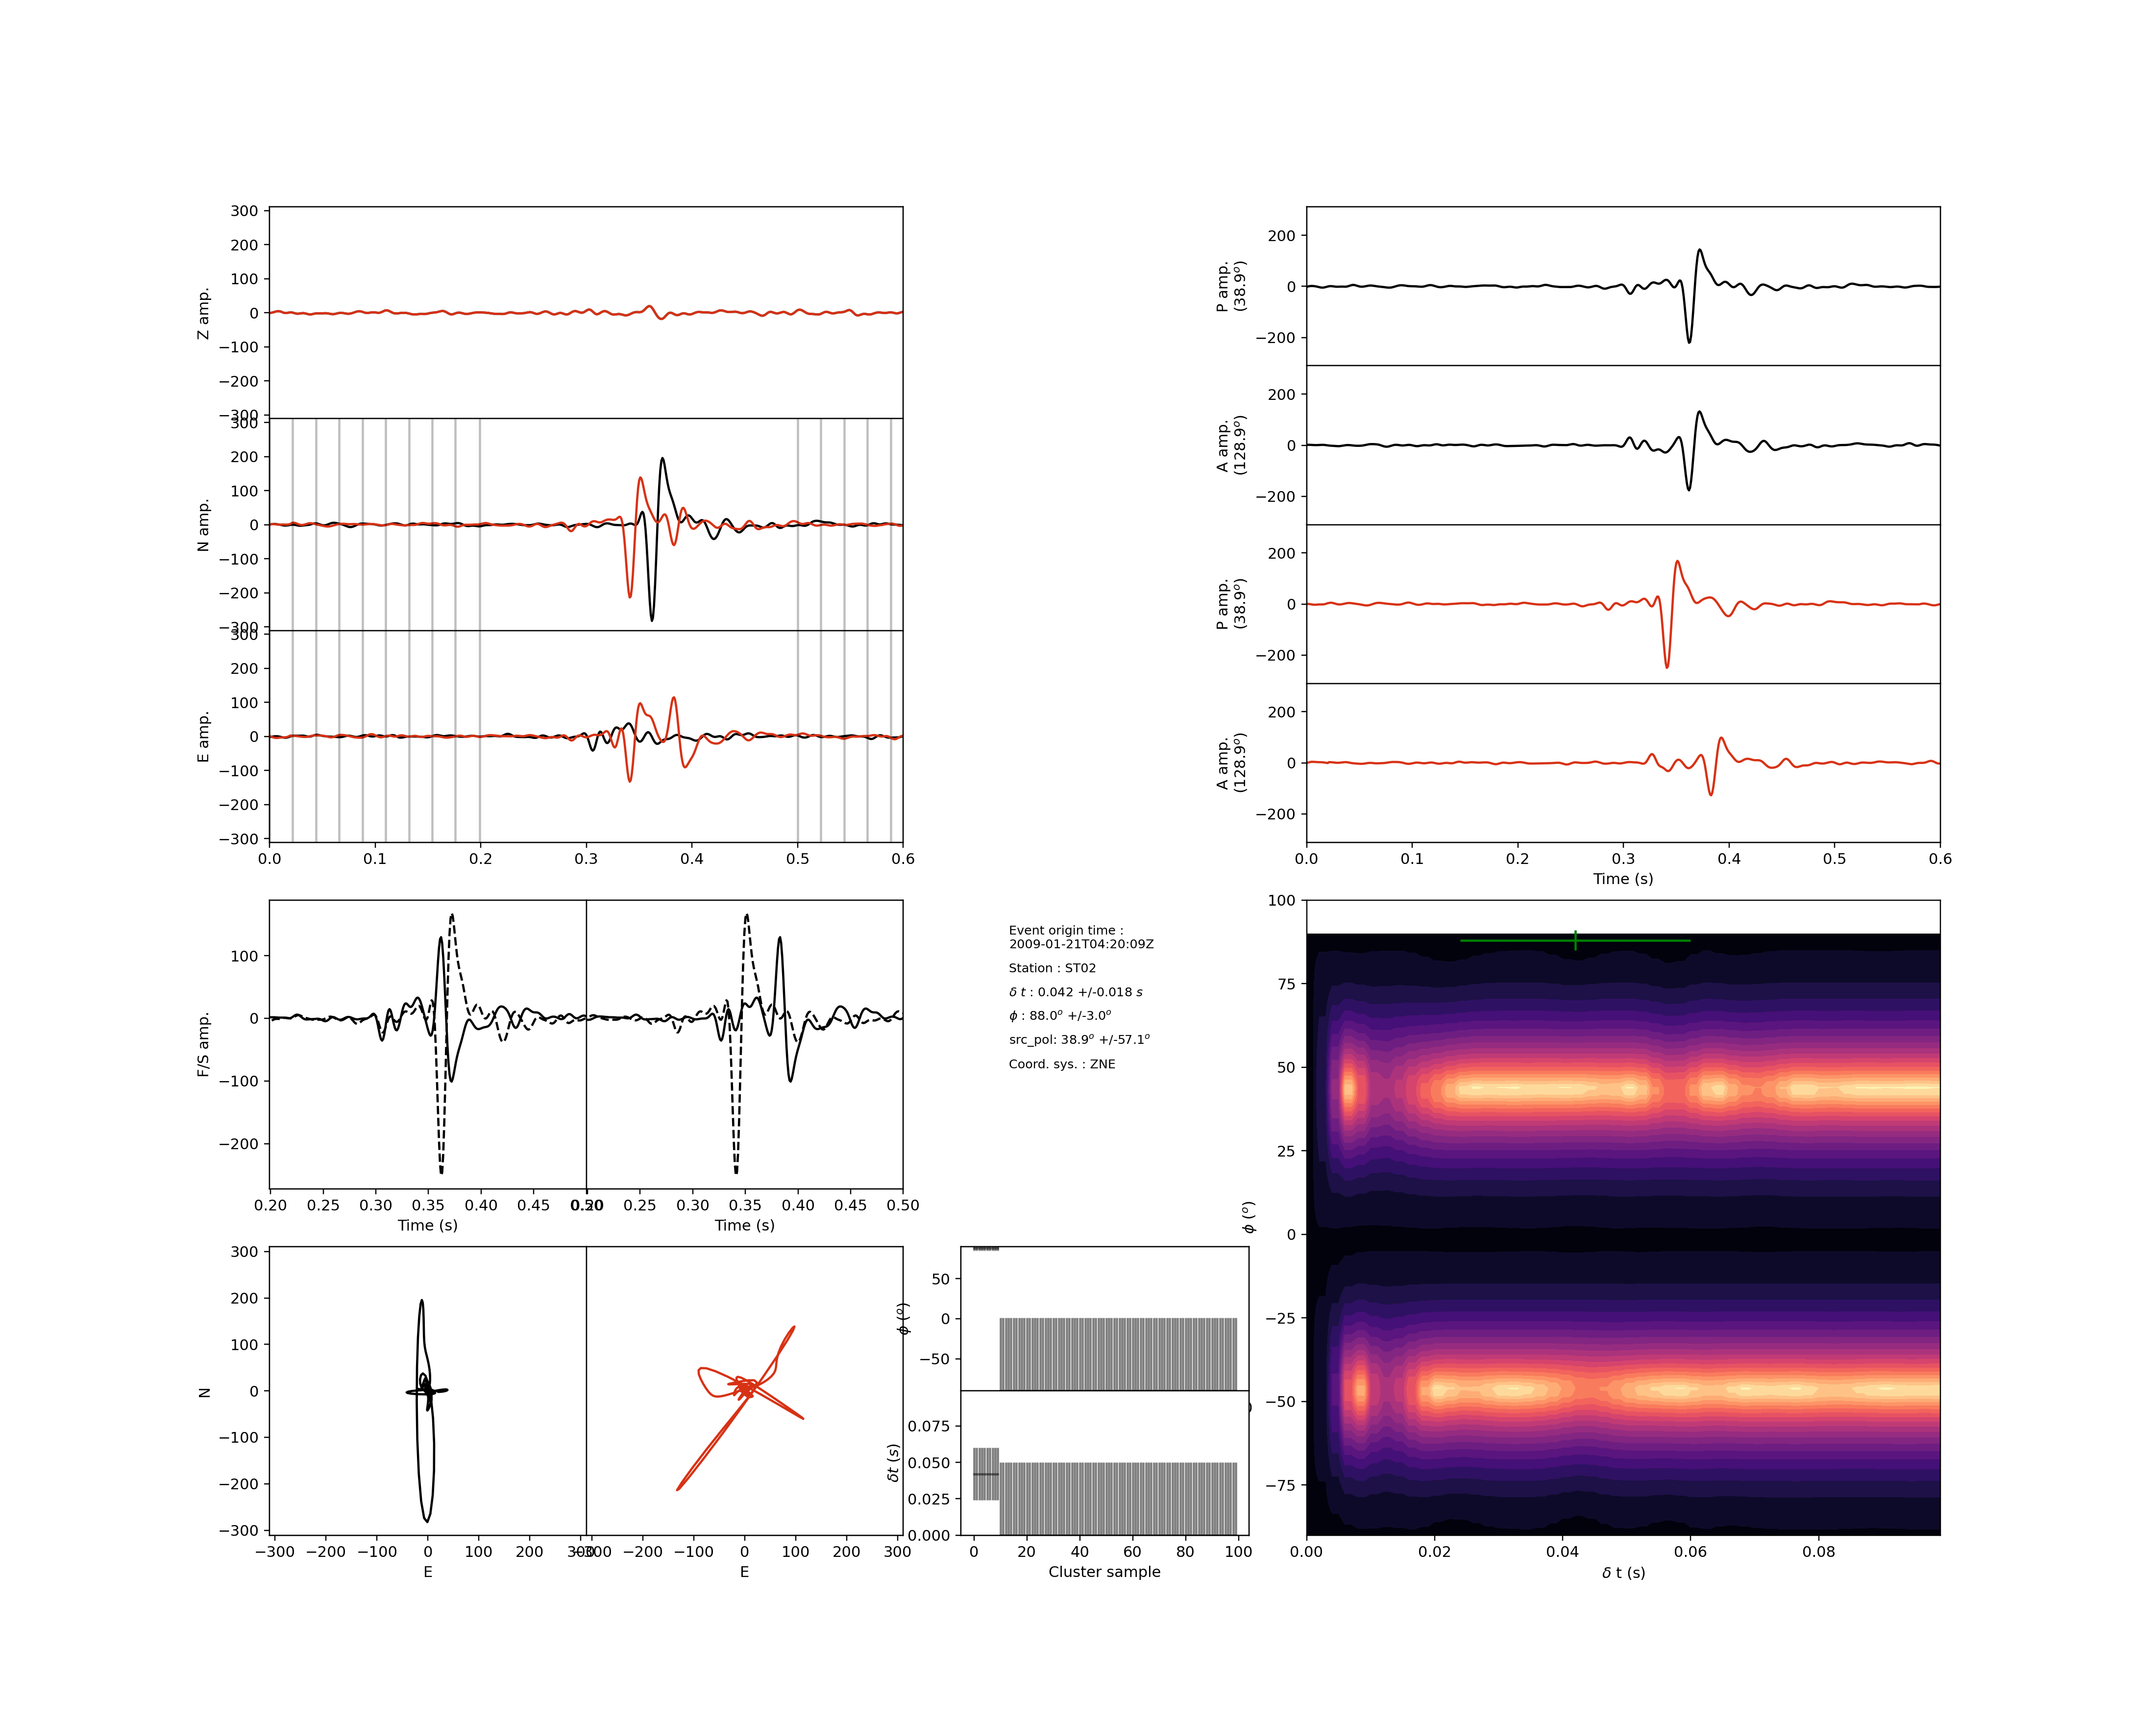

<IPython.core.display.Javascript object>


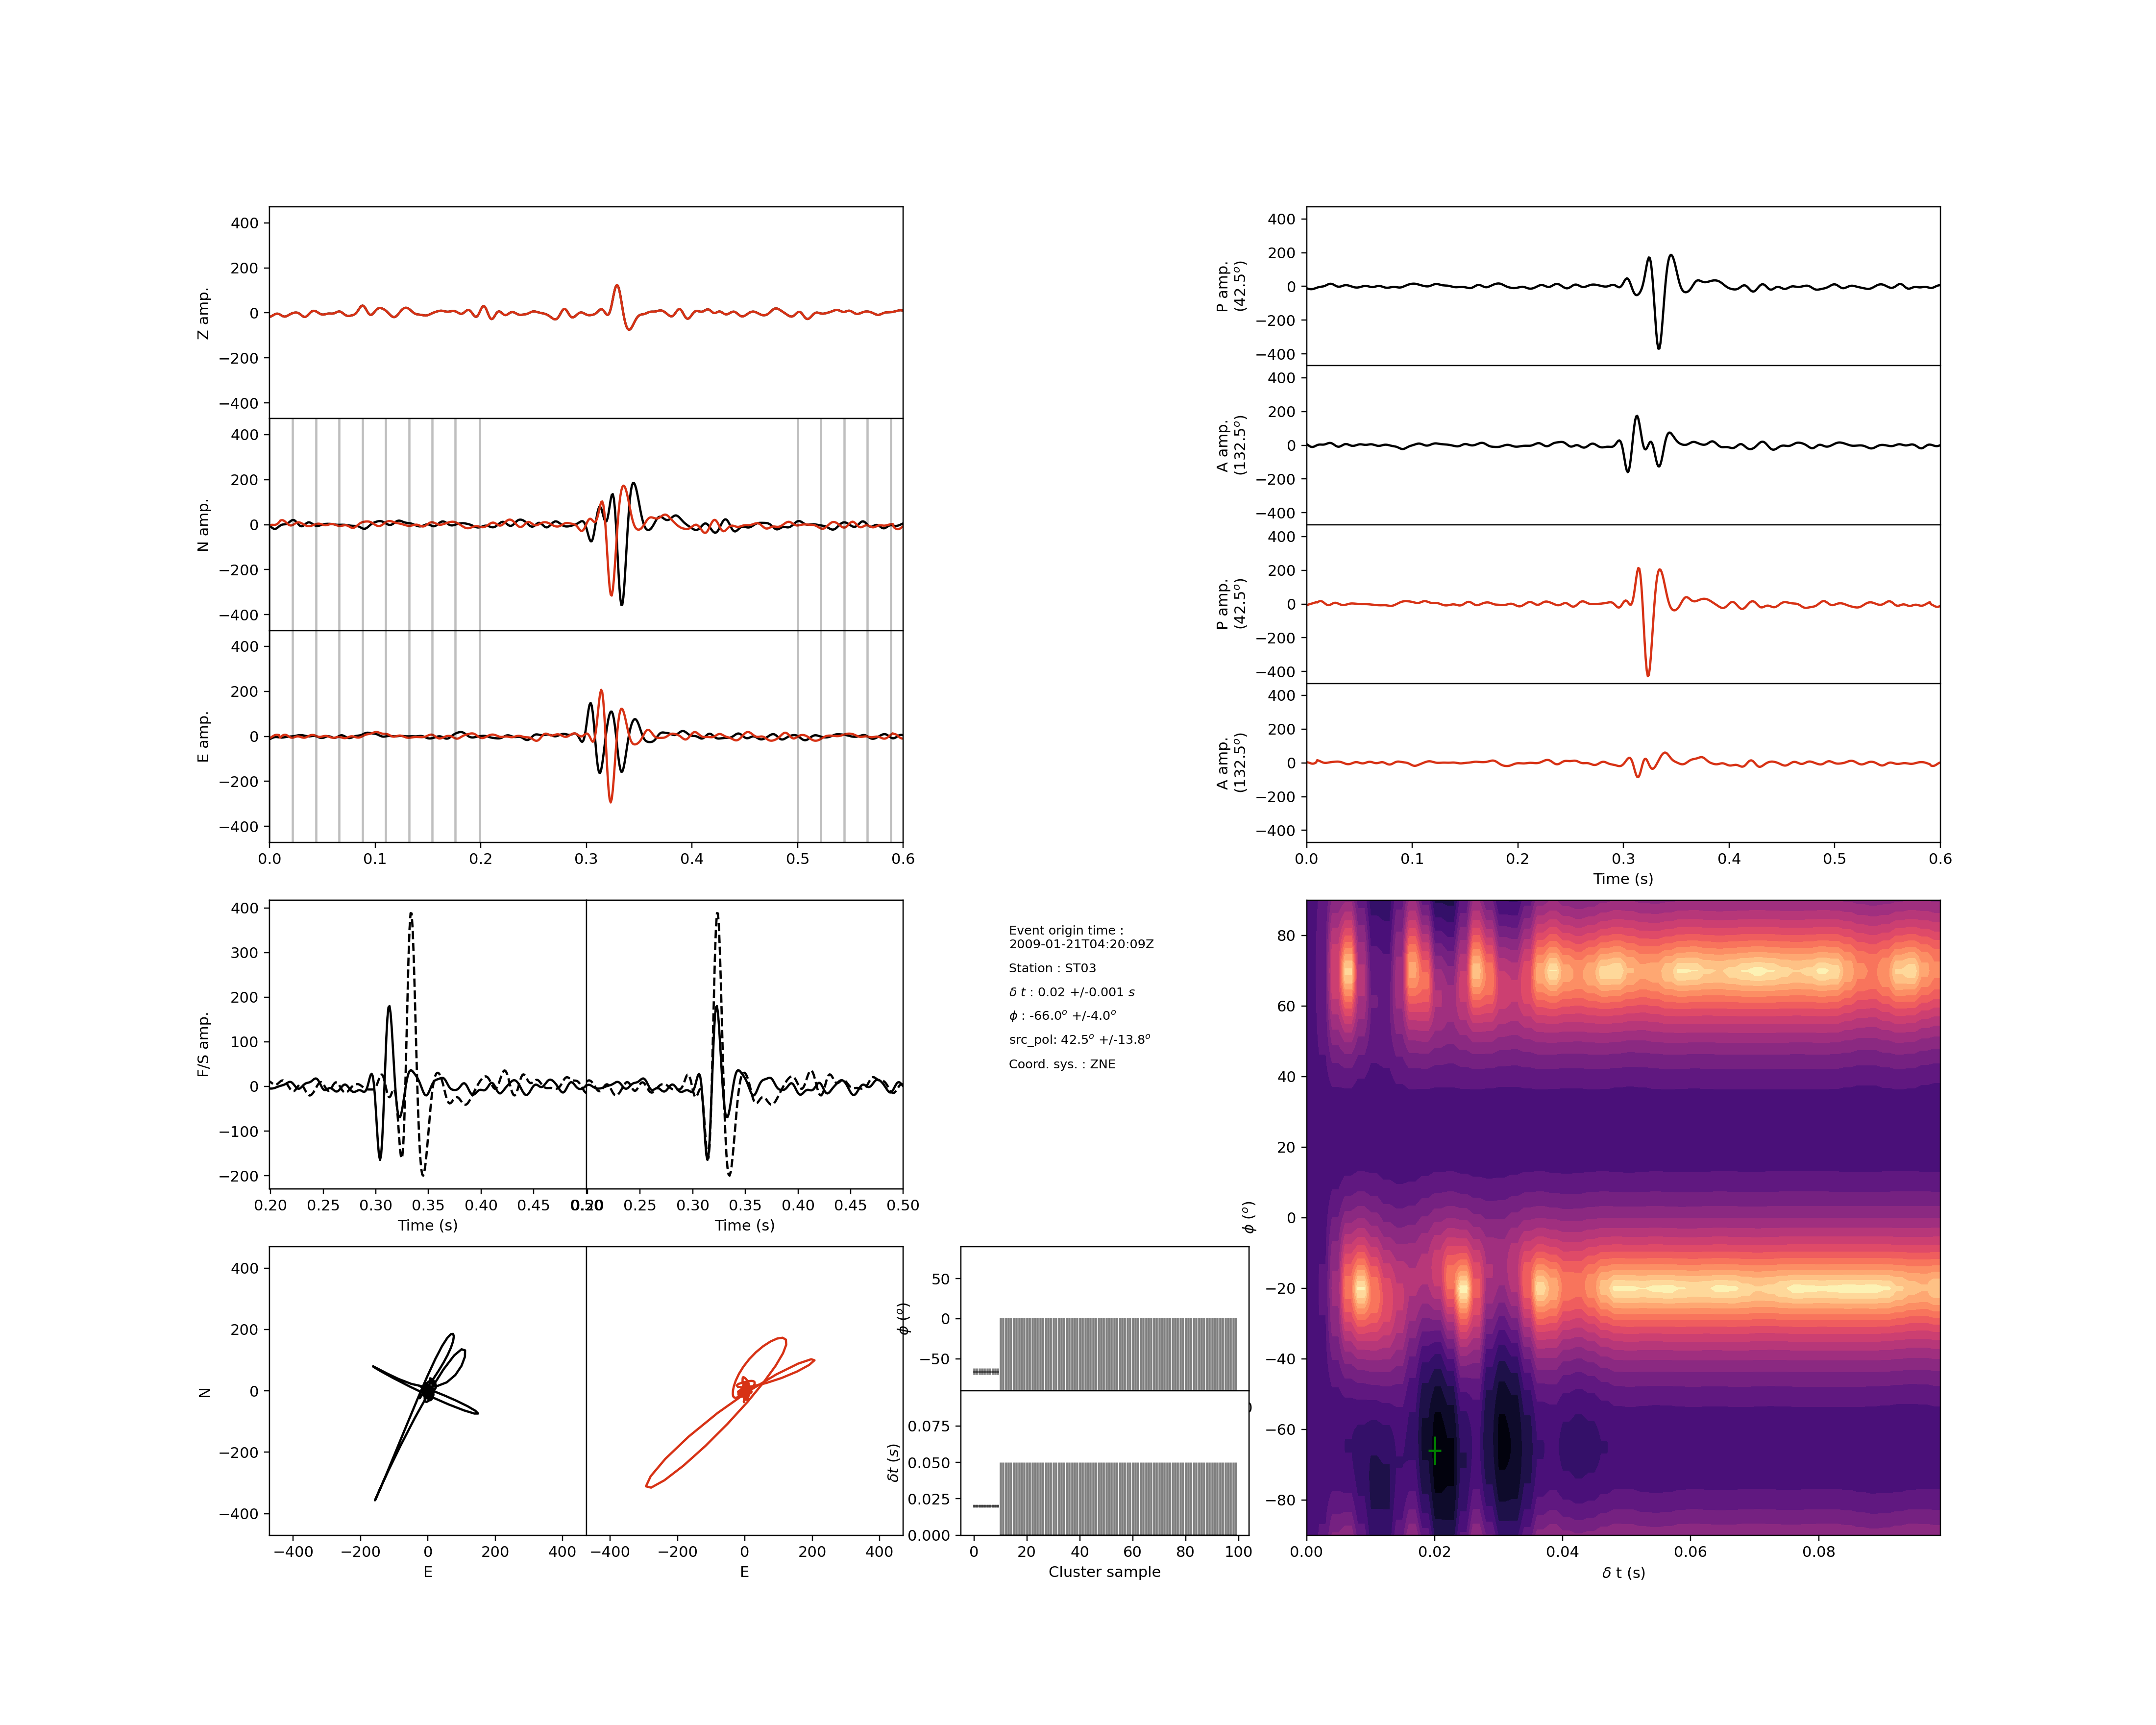

<IPython.core.display.Javascript object>


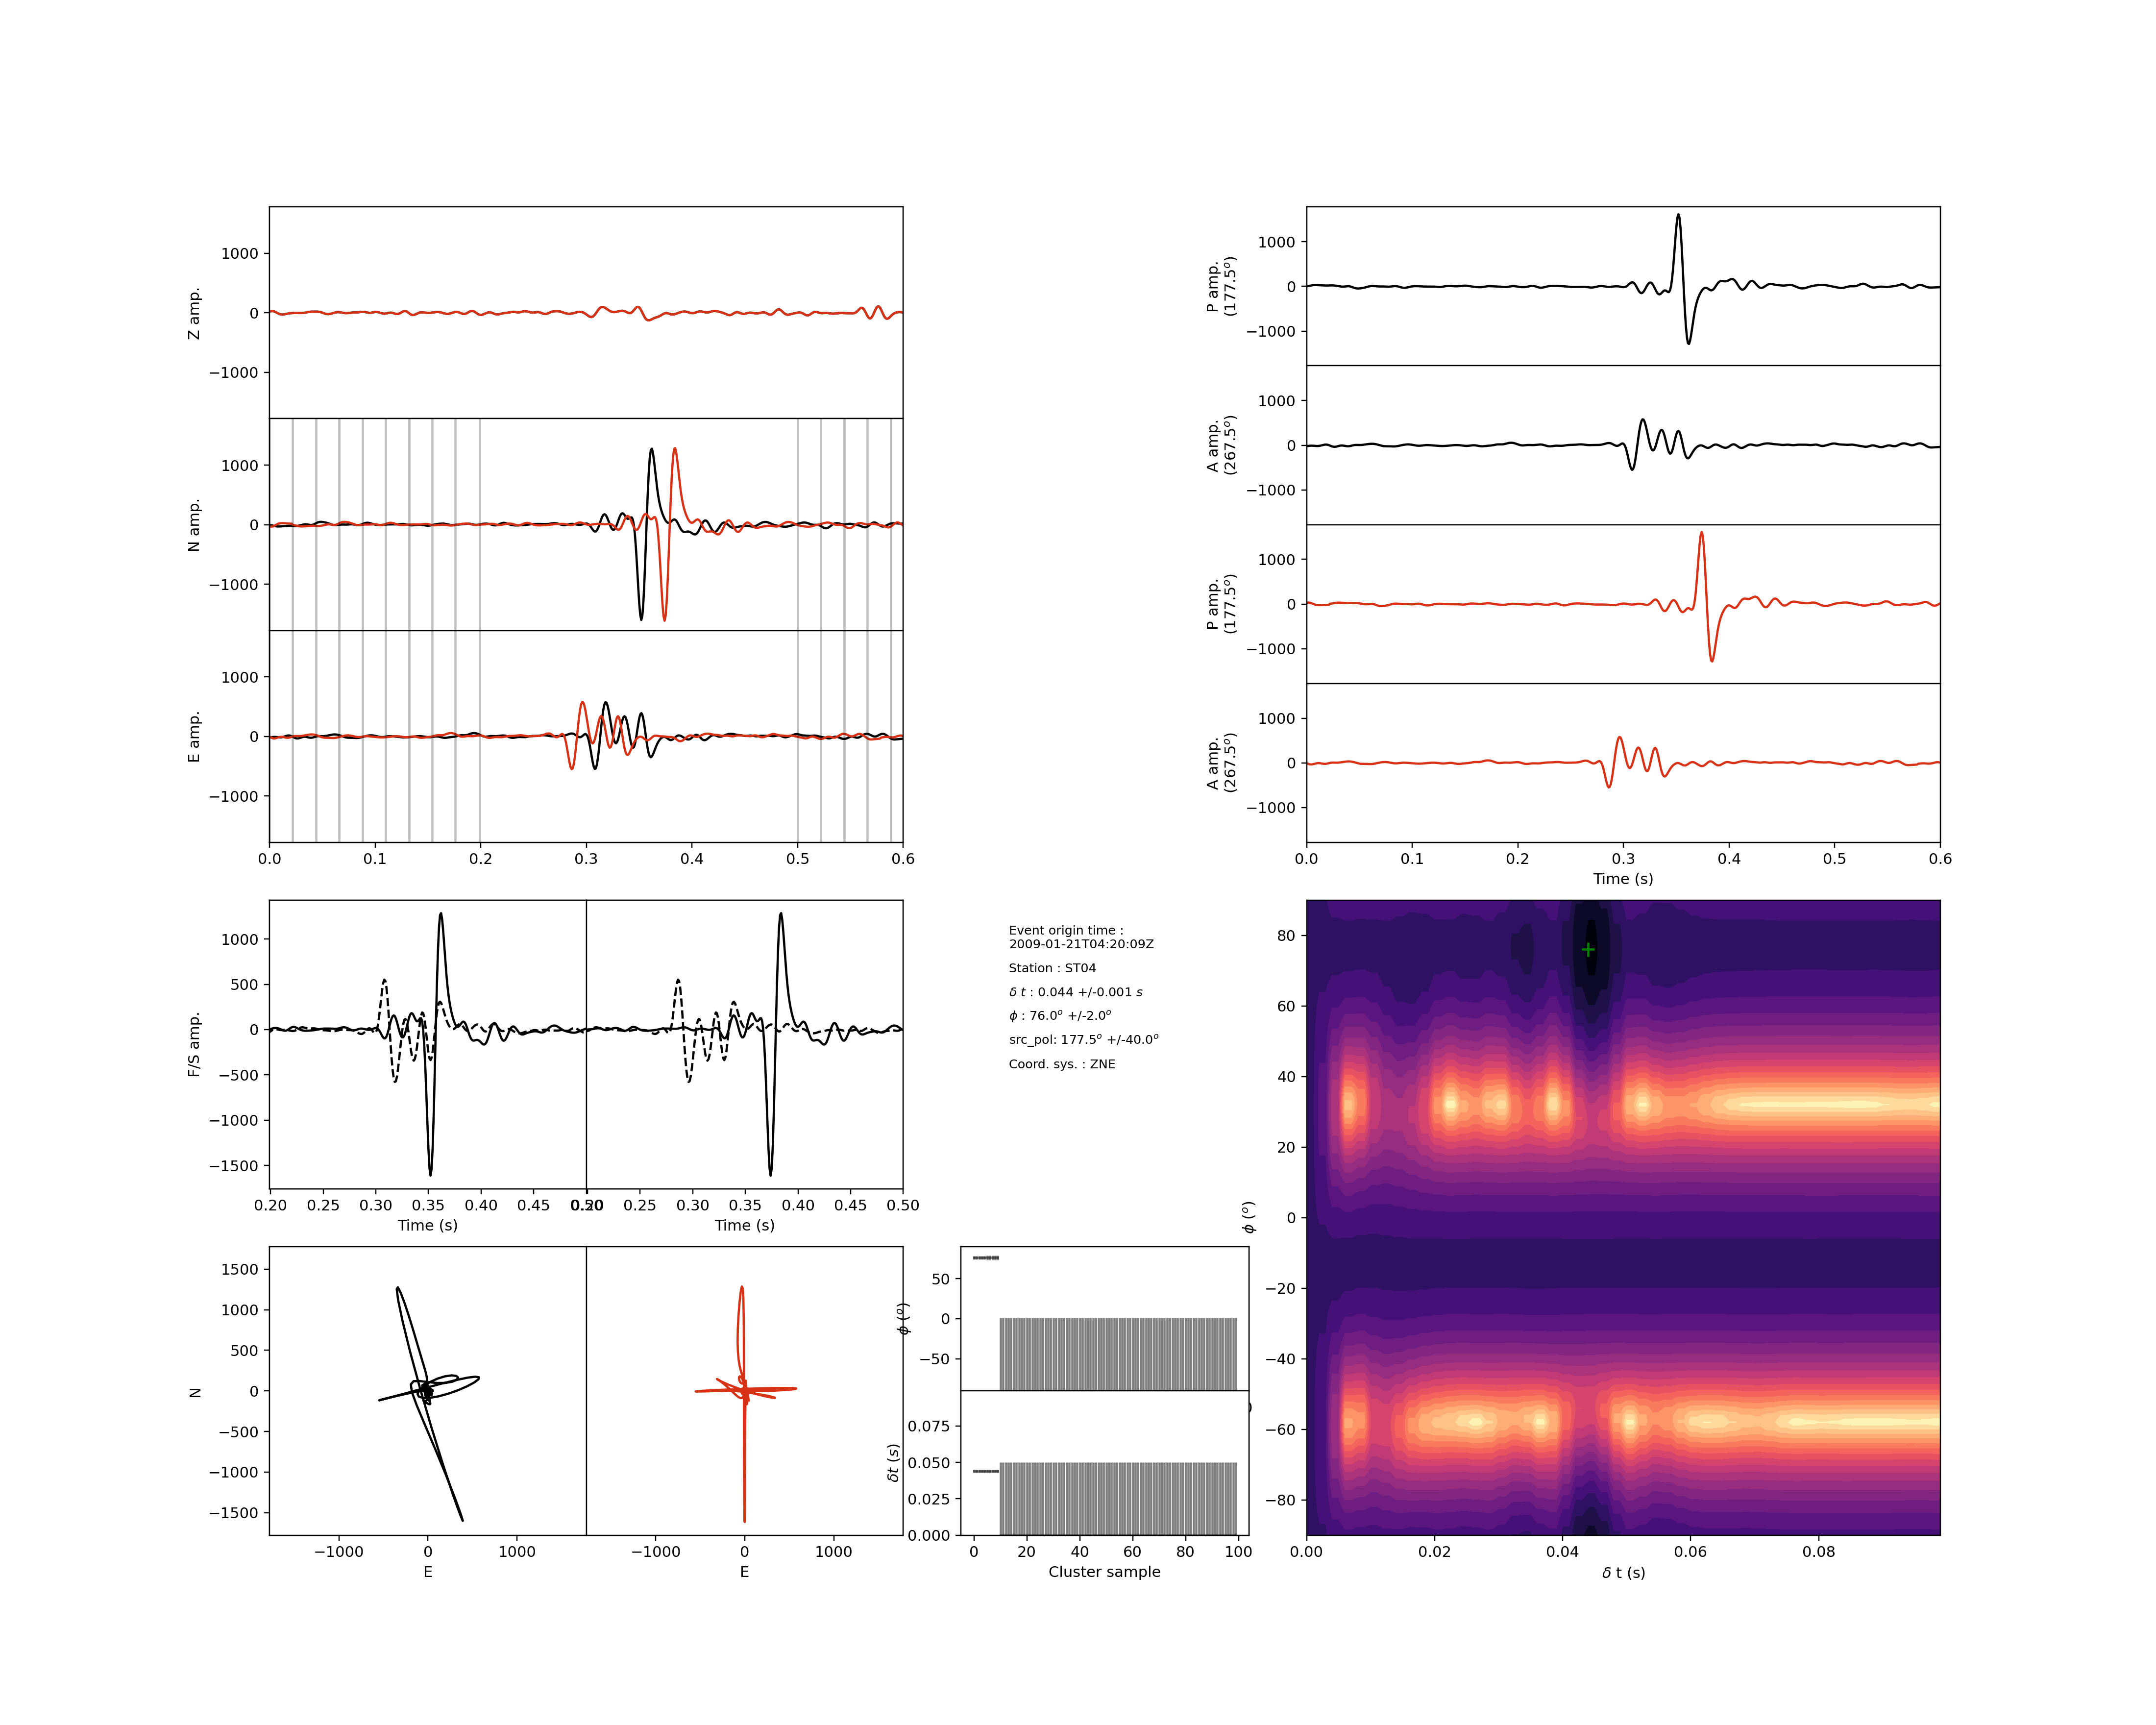

<IPython.core.display.Javascript object>


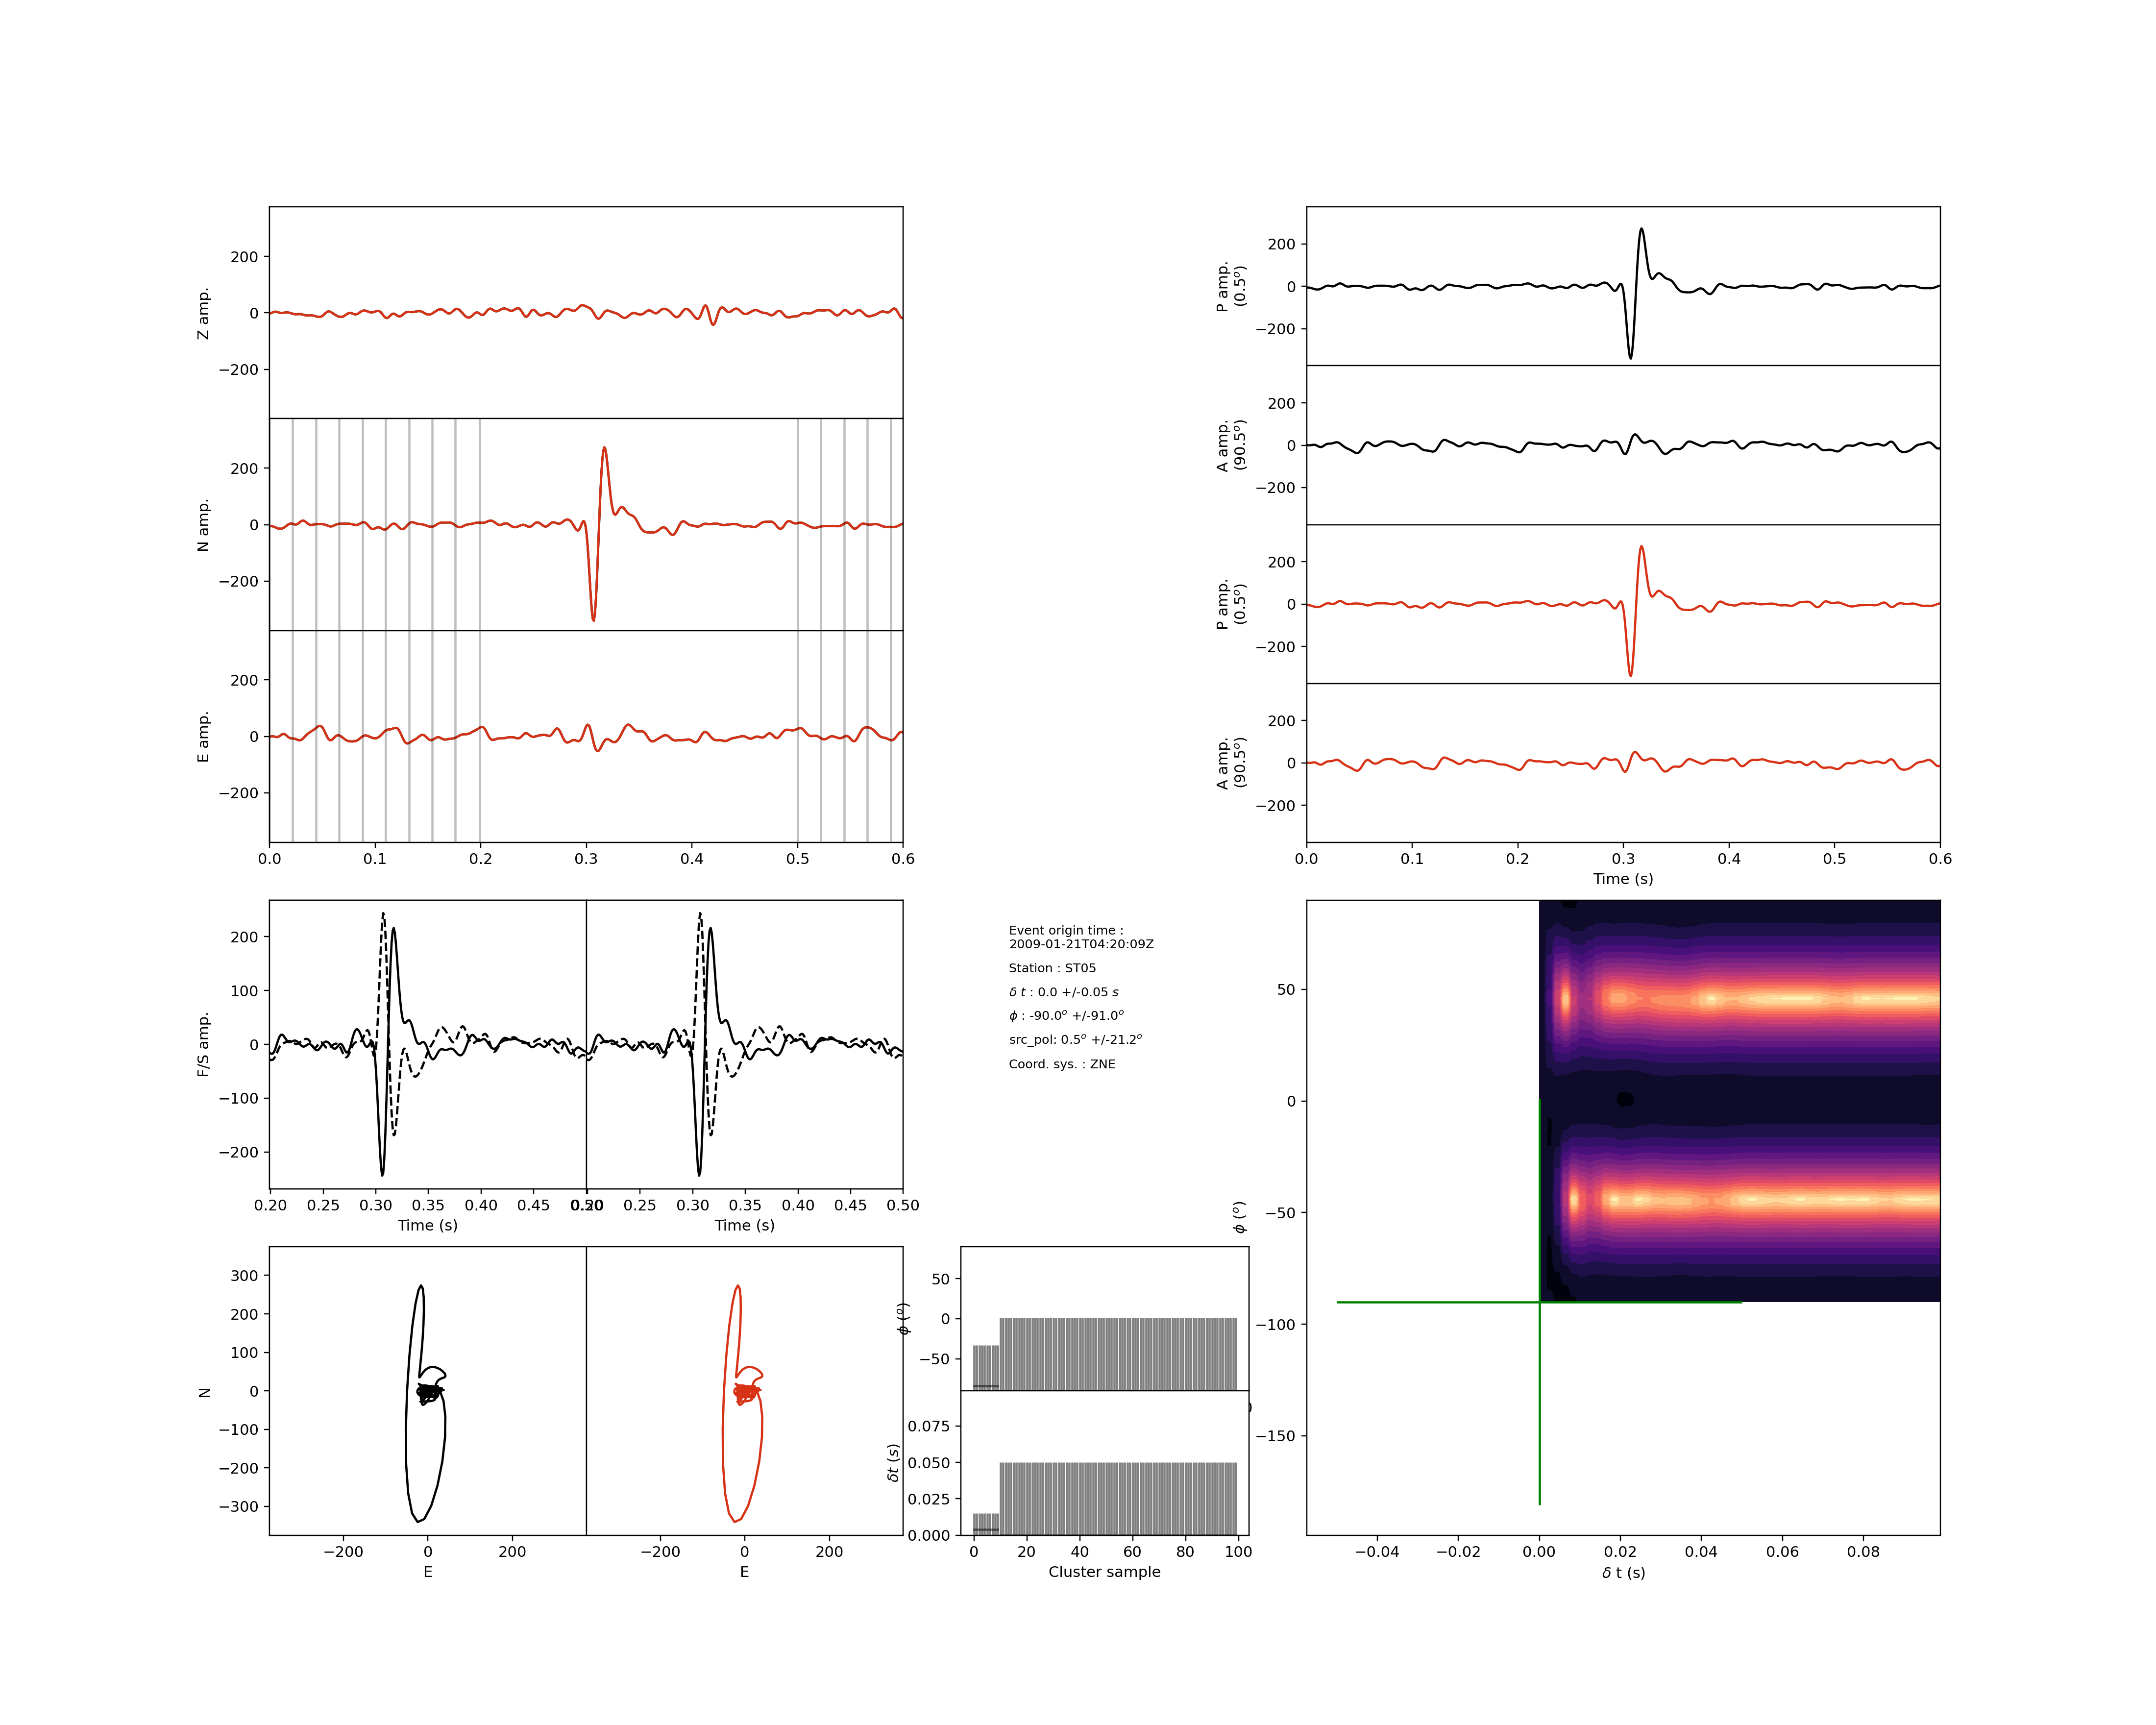

No S phase pick for station: ST06 therefore skipping this station.
Skipping waveform correction for station: ST06
No S phase pick for station: ST07 therefore skipping this station.
Skipping waveform correction for station: ST07
No S phase pick for station: ST08 therefore skipping this station.
Skipping waveform correction for station: ST08
No S phase pick for station: ST09 therefore skipping this station.
Skipping waveform correction for station: ST09
No S phase pick for station: ST10 therefore skipping this station.
Skipping waveform correction for station: ST10


In [45]:
splitting_event.plot()

## 4. Save result:

In [15]:
# And save result to file:
splitting_event.save_result()


Saved sws result to: /Users/eart0504/Documents/python/github_repositories/swspy/examples/icequake_example/20090121042009_sws_result.csv


In [16]:
tic = time.process_time() # TIMING!!!
toc = time.process_time() # TIMING!!!
print("Time taken:", toc-tic) # TIMING!!!

NameError: name 'time' is not defined